# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the first part of the assignment. Second part is waiting for you in the same directory.*__

## Part 1. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,759,94,50,84,138,57,10,156,44,20,170,171,351,187,77,5,6,182,191
1,642,95,46,104,208,66,9,191,35,22,148,210,543,169,68,0,28,190,200
2,558,85,43,66,121,54,7,150,46,19,147,169,324,175,87,0,5,179,182
3,603,90,36,85,184,64,6,160,41,20,125,187,385,139,66,9,31,195,203
4,448,101,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192
5,734,88,40,55,114,53,7,132,53,18,139,142,249,158,87,0,7,176,183
6,96,89,42,80,151,62,6,144,46,19,139,166,308,170,74,17,13,185,189
7,314,90,42,63,126,55,7,152,45,19,142,173,336,173,81,0,15,180,184
8,832,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199
9,379,105,56,98,209,64,11,217,31,24,173,225,696,216,72,2,19,188,199


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.877960,94.094718,45.149362,83.065574,170.697632,62.027322,8.708561,170.428051,40.539162,20.704918,148.673953,190.163934,448.030965,176.036430,72.420765,6.530055,12.539162,189.085610,195.897996
std,243.939866,8.114495,6.139758,15.387669,33.632780,8.505536,4.853205,33.433898,7.678105,2.629908,14.488772,31.868951,179.294901,32.881763,7.799004,4.975626,8.889057,6.025035,7.246228
min,0.000000,78.000000,33.000000,47.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,135.000000,193.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,88.000000,40.000000,71.000000,144.000000,57.000000,7.000000,148.000000,33.000000,19.000000,138.000000,168.000000,323.000000,152.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,407.000000,93.000000,45.000000,82.000000,170.000000,62.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,629.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,45.000000,23.000000,160.000000,218.000000,596.000000,200.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,39.000000,203.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### Looking at the dataset, it contains numeric values except for the target. Therefore, we need to encode the target first

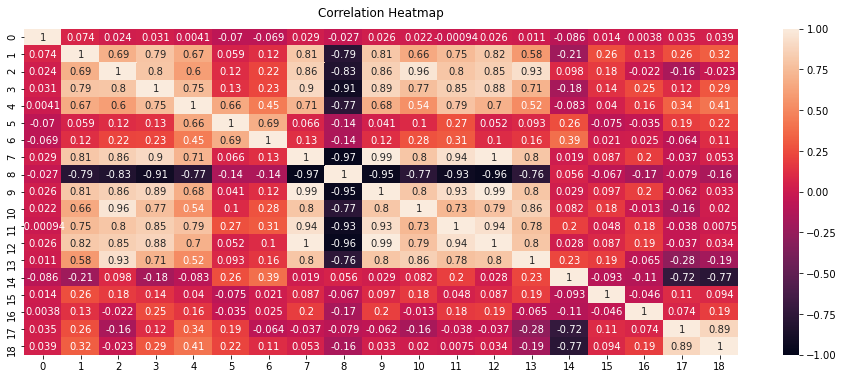

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_train_pd.corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
# The target is still a string. The unique values are: bus / van / opel and saab. 
# I label encode these four to 0, 1, 2, 3 so we can have numerical estimation

# Train
le_train = preprocessing.LabelEncoder()
le_train.fit(y_train)

print(le_train.classes_)

y_train = le_train.transform(y_train)
le_train.inverse_transform(y_train)

# Test
le_test = preprocessing.LabelEncoder()
le_test.fit(y_test)

print(le_test.classes_)

y_test = le_test.transform(y_test)
le_test.inverse_transform(y_test)

['bus' 'opel' 'saab' 'van']
['bus' 'opel' 'saab' 'van']


array(['opel', 'opel', 'van', 'bus', 'saab', 'van', 'van', 'saab', 'saab',
       'bus', 'saab', 'van', 'saab', 'saab', 'saab', 'opel', 'bus', 'van',
       'saab', 'bus', 'saab', 'bus', 'bus', 'opel', 'bus', 'van', 'van',
       'van', 'van', 'van', 'bus', 'opel', 'opel', 'van', 'van', 'opel',
       'saab', 'saab', 'saab', 'opel', 'van', 'saab', 'saab', 'bus',
       'van', 'van', 'saab', 'saab', 'bus', 'opel', 'saab', 'opel', 'bus',
       'saab', 'saab', 'bus', 'van', 'opel', 'van', 'opel', 'van', 'bus',
       'bus', 'saab', 'bus', 'van', 'van', 'bus', 'opel', 'saab', 'saab',
       'bus', 'opel', 'bus', 'van', 'saab', 'bus', 'opel', 'opel', 'saab',
       'bus', 'opel', 'bus', 'bus', 'van', 'saab', 'van', 'opel', 'bus',
       'opel', 'van', 'opel', 'bus', 'opel', 'bus', 'saab', 'bus', 'bus',
       'van', 'opel', 'opel', 'opel', 'van', 'van', 'opel', 'bus', 'saab',
       'van', 'opel', 'van', 'opel', 'opel', 'opel', 'opel', 'van', 'van',
       'van', 'saab', 'van', 'opel', 'sa

In [7]:
# Small check on train
pd.DataFrame(y_train).head(5)

,0
0,3
1,2
2,0
3,2
4,0


In [8]:
# Small check on test
pd.DataFrame(y_test).head(5)

,0
0,1
1,1
2,3
3,0
4,2


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
from sklearn.model_selection import GridSearchCV

# Estimate with 'accuracy' score
penalty = ['l1', 'l2', 'elasticnet', 'none']
hyper = {'penalty': penalty}
gd = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', random_state=0,\
                                 solver='saga', tol=1e-3, max_iter=500),
    param_grid=hyper,
    scoring='accuracy',
    verbose=False
)
gd.fit(X_train, y_train)
print('Best accuracy: ', gd.best_score_)
print(gd.best_estimator_)

/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/

Best accuracy:  0.7267556296914096
LogisticRegression(max_iter=500, multi_class='multinomial', penalty='l1',
                   random_state=0, solver='saga', tol=0.001)


/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7609427609427609
0.7609427609427609


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

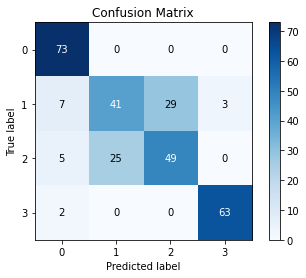

In [10]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import scikitplot as skplt

# Build pipeline
model = make_pipeline(\
                     StandardScaler(),\
                     LogisticRegression(multi_class='multinomial', \
                                        solver='saga', \
                                        tol=1e-3, \
                                        max_iter=500))

# Fit training data to traintarget
model.fit(X_train, y_train)

# Estimate y
y_pred = model.predict(X_test)

# Compute requested metrics
print( f1_score(y_test, y_pred, average='micro') )
print( accuracy_score(y_test, y_pred) )

# Plot ROC-curve for trained model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
simple_matrix = np.arange(20).reshape((4, 5))
u, S, v = np.linalg.svd(X_train, full_matrices=False)
print('Matrix shape: ', X_train.shape)
print('U shape: ', u.shape)
print('S shape: ', S.shape)
print('V shape: ', v.shape)

Matrix shape:  (549, 19)
U shape:  (549, 19)
S shape:  (19,)
V shape:  (19, 19)


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

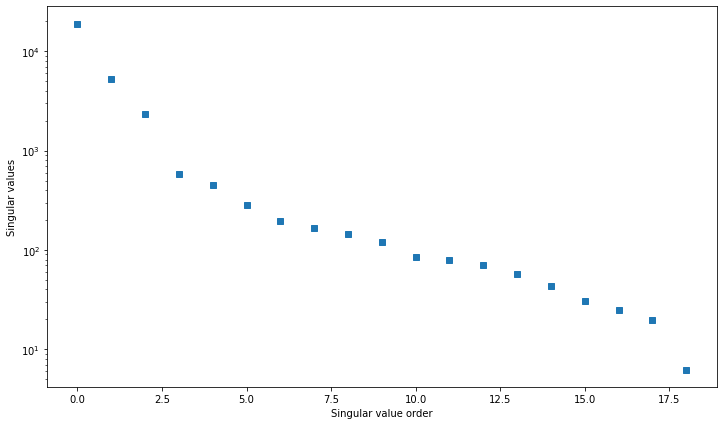

In [14]:
plt.figure(figsize=(12,7))
plt.plot(S,'s')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [15]:
def scaleAndTransform(DF):
    scaler = StandardScaler()
    scaler.fit(DF)
    scaled_data = scaler.transform(DF)
    return scaled_data

In [16]:
X_train = scaleAndTransform(X_train)
X_test = scaleAndTransform(X_test)

I'm choosing 8 components because this takes into account the directions in space where there is the most variance.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

### check : PCA after scaler

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
pca.fit(X_train)
pca.fit(X_test)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

# PC in 

(549, 8)

0.5723905723905723
0.5723905723905723


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

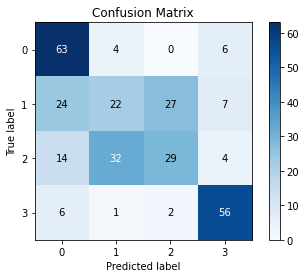

In [18]:
# Build pipeline
model = make_pipeline(\
                     StandardScaler(),\
                     LogisticRegression(multi_class='multinomial', \
                                        solver='saga', \
                                        tol=1e-3)
                     )

# Fit training data to traintarget
model.fit(X_train_pca, y_train)

# Estimate y
y_pred = model.predict(X_test_pca)

# Compute requested metrics
print( f1_score(y_test, y_pred, average='micro') )
print( accuracy_score(y_test, y_pred) )

# Plot ROC-curve for trained model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

n_treemax = 200
trees = np.linspace(1, n_treemax, n_treemax, endpoint=True)
F1_list_dtree = [0] * n_treemax
ACC_list_dtree = [0] * n_treemax

for i in range(1, n_treemax):
    modelTree = DecisionTreeClassifier(max_depth = i)
    modelTree.fit(X_train_pca, y_train)

    # Estimate y
    y_pred_dtree = modelTree.predict(X_test_pca)

    F1_list_dtree[i] = f1_score(y_test, y_pred_dtree, average='micro') 
    ACC_list_dtree[i] = accuracy_score(y_test, y_pred_dtree) 

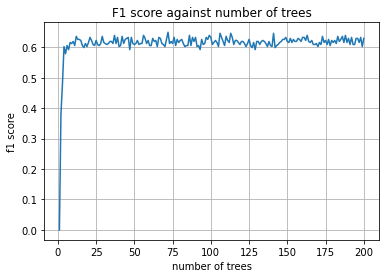

In [20]:
fig, ax = plt.subplots()
ax.plot(trees, F1_list_dtree)
ax.set(xlabel='number of trees', ylabel='f1 score',
       title='F1 score against number of trees')
ax.grid()
plt.show()

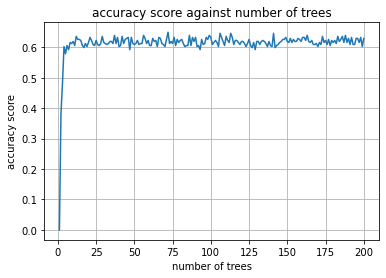

In [21]:
fig, ax = plt.subplots()
ax.plot(trees, ACC_list_dtree)
ax.set(xlabel='number of trees', ylabel='accuracy score',for i in range(1, n_treemax):
    modelTree = DecisionTreeClassifier(max_depth = i)
    modelTree.fit(X_train_pca, y_train)
       title='accuracy score against number of trees')
ax.grid()
plt.show()

optimal depth lies around 10

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [41]:
from sklearn.ensemble import BaggingClassifier

n_treemax = 200

trees = []
F1_list_bg = []
ACC_list_bg = []
for i  in range(2, n_treemax, 5):
    trees.append(i)
    bg = BaggingClassifier(\
                          DecisionTreeClassifier(),\
                          max_samples = i, \
                          max_features = 1.0, \
                          n_estimators = X_train_pca.shape[1]
                        )
    bg.fit(X_train_pca, y_train)
    y_pred_bg = bg.predict(X_test_pca)

    # Compute requested metrics
    F1_list_bg.append( f1_score(y_test, y_pred_bg, average='micro') )
    ACC_list_bg.append( accuracy_score(y_test, y_pred_bg) )


<Figure size 72x432 with 0 Axes>

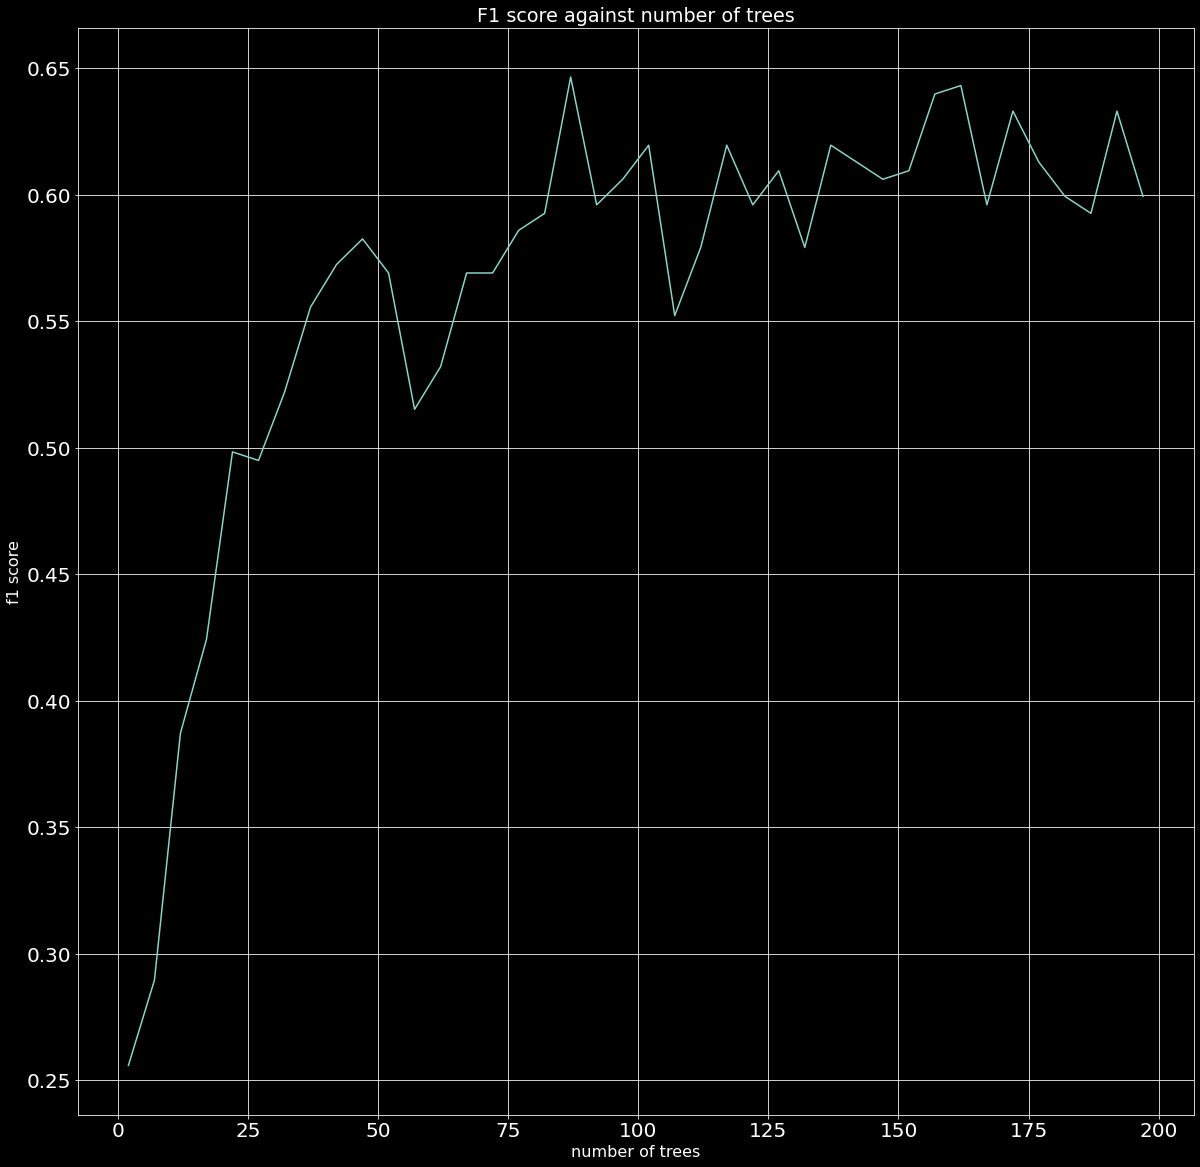

In [57]:
fig, ax = plt.subplots()
ax.plot(trees, F1_list_bg)
ax.set(xlabel='number of trees', ylabel='f1 score',
       title='F1 score against number of trees')
ax.grid()
plt.show()

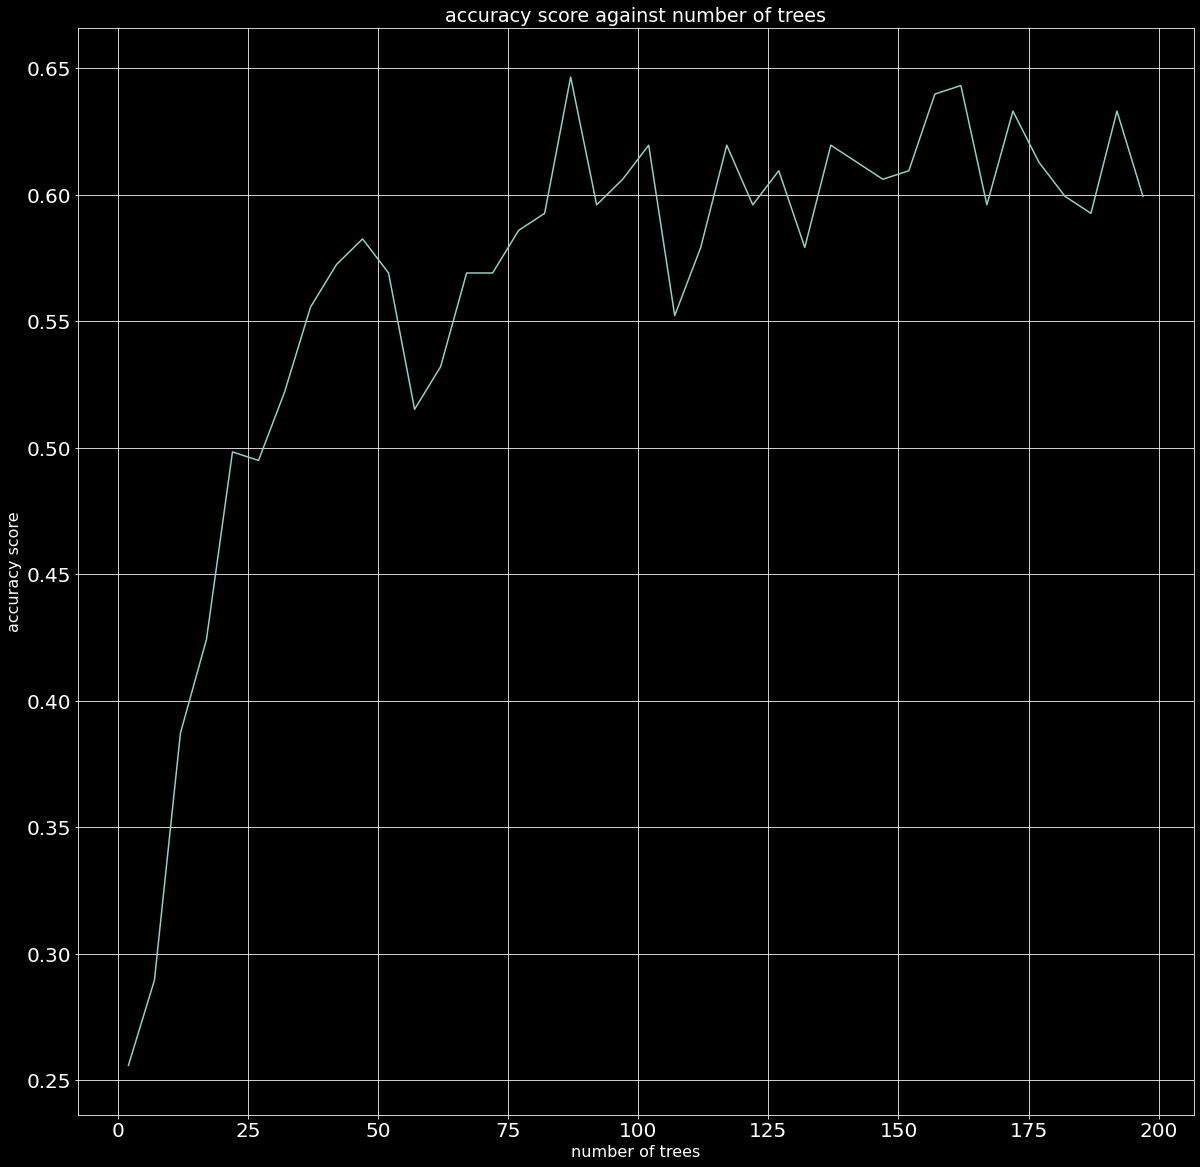

In [43]:
fig, ax = plt.subplots()
ax.plot(trees, ACC_list_bg)
ax.set(xlabel='number of trees', ylabel='accuracy score',
       title='accuracy score against number of trees')
ax.grid()
plt.show()

In [58]:
F1_list_lr = []
ACC_list_lr = []
trees = []

for i  in range(2, n_treemax, 5):
    trees.append(i)
    bg = BaggingClassifier(\
                           LogisticRegression( \
                           multi_class='multinomial',\
                           solver='saga', \
                           max_iter=500, \
                           tol=1e-3), \
                           max_samples = i, \
                           max_features = 1.0, \
                           n_estimators = X_train_pca.shape[1]
                          )
    
    bg.fit(X_train_pca, y_train)
    y_pred_lr = bg.predict(X_test_pca)

    # Compute requested metrics
    F1_list_lr.append( f1_score(y_test, y_pred_bg, average='micro') )
    ACC_list_lr.append( accuracy_score(y_test, y_pred_bg) )

/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/berend/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


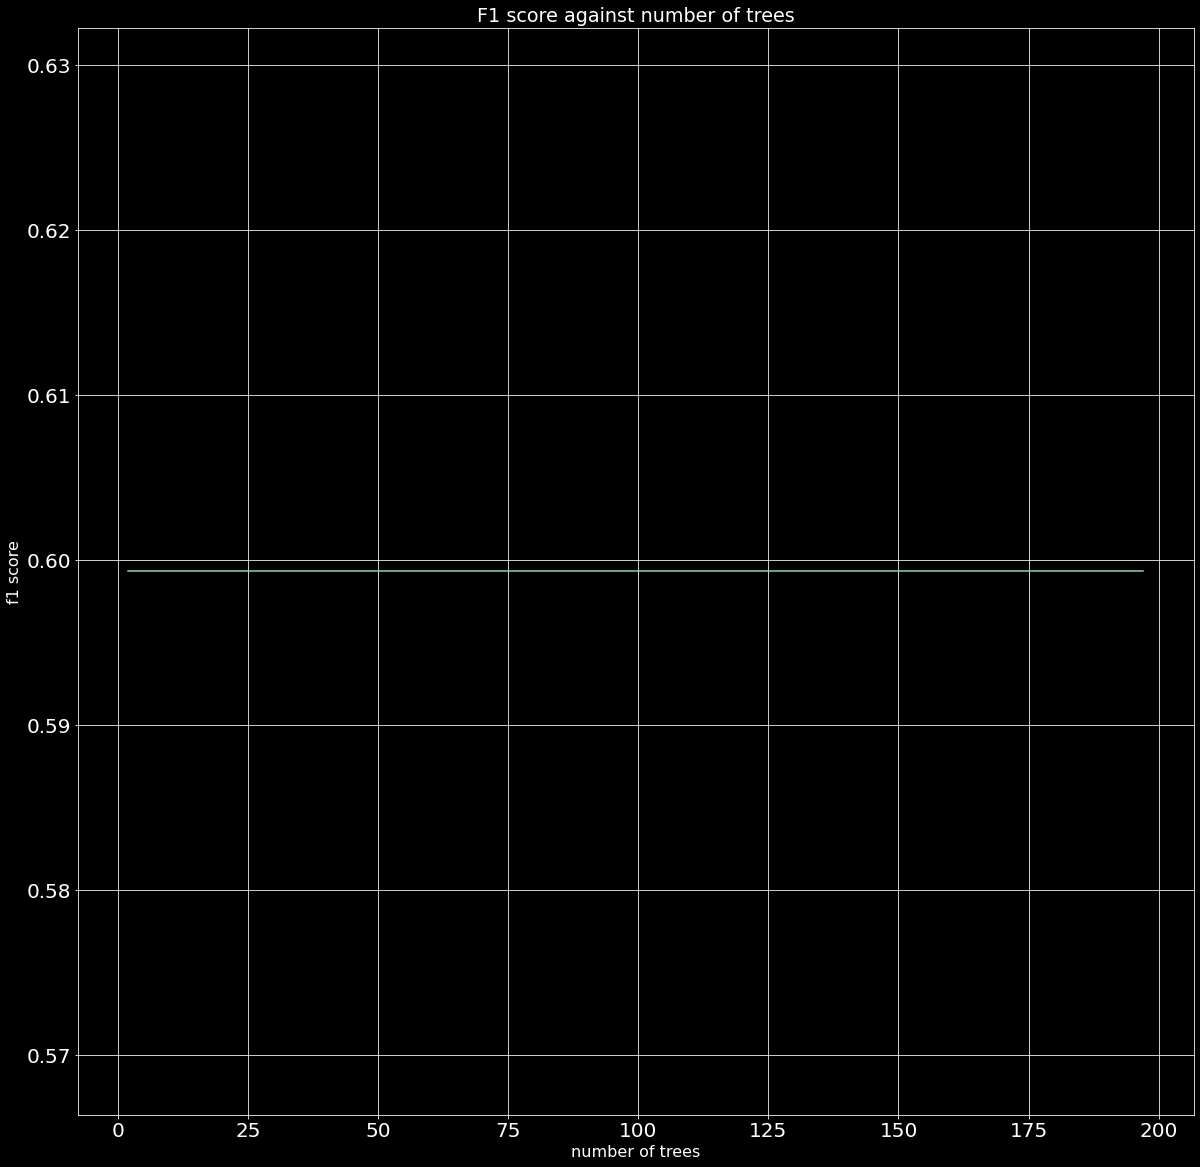

In [59]:
fig, ax = plt.subplots()
ax.plot(trees, F1_list_lr)
ax.set(xlabel='number of trees', ylabel='f1 score',
       title='F1 score against number of trees')
ax.grid()
plt.show()

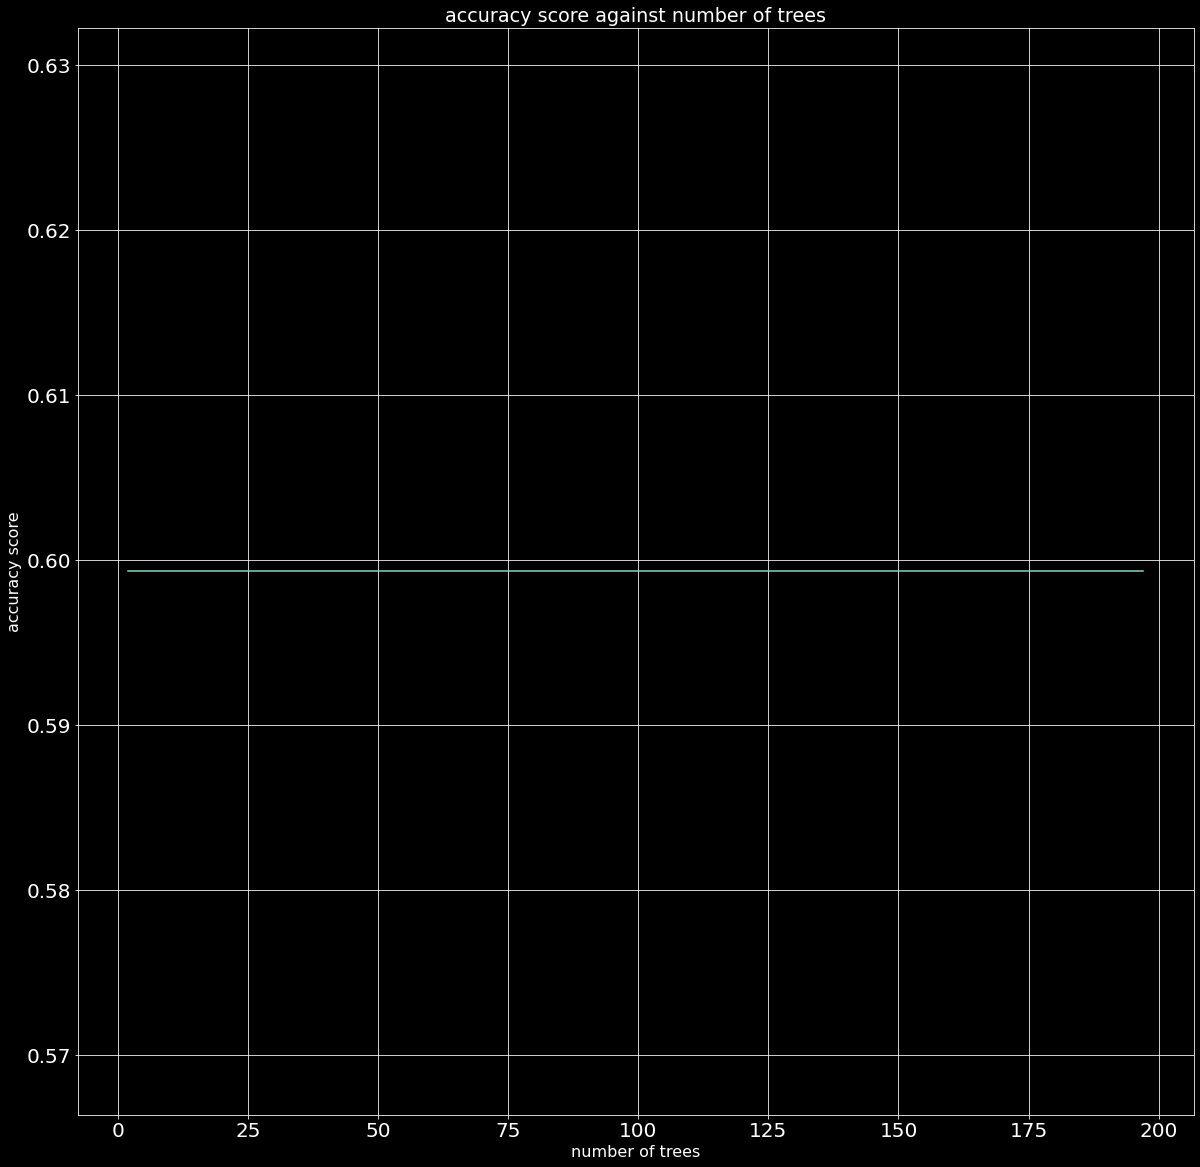

In [60]:
treesfig, ax = plt.subplots()
ax.plot(trees, ACC_list_lr)
ax.set(xlabel='number of trees', ylabel='accuracy score',
       title='accuracy score against number of trees')
ax.grid()
plt.show()

The optimal number of decision trees here lies around 150, because after that the metrics do not improve anymore.

I think the hyperparameters I found in 2.5 are pretty optimal because the bagging does not provide greater accuracy

Also bagging a logistic regressor is not of very big use because there is not a lot of variance in the result of a logistic regressor

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [28]:
from sklearn.ensemble import RandomForestClassifier
n_treemax = 200
trees = np.linspace(1, n_treemax, n_treemax, endpoint=True)
F1_list_forest = [0] * n_treemax
ACC_list_forest = [0] * n_treemax

for i in range(1, n_treemax):
    modelForest = RandomForestClassifier(n_estimators = i)
    modelForest.fit(X_train, y_train)
    # Estimate y
    y_pred_forest = modelForest.predict(X_test)
    # Compute requested metrics
    F1_list_forest[i] = f1_score(y_test, y_pred_forest, average='micro') 
    ACC_list_forest[i] = accuracy_score(y_test, y_pred_forest) 

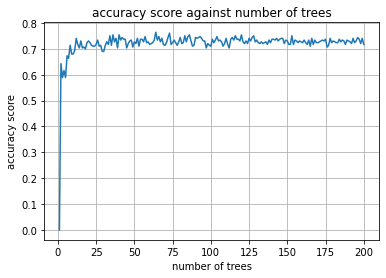

In [29]:
fig, ax = plt.subplots()
ax.plot(trees, F1_list_forest)
ax.set(xlabel='number of trees', ylabel='accuracy score',
       title='accuracy score against number of trees')
ax.grid()
plt.show()

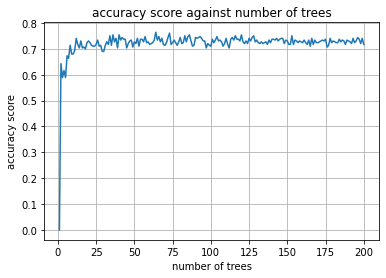

In [30]:
fig, ax = plt.subplots()
ax.plot(trees, ACC_list_forest)
ax.set(xlabel='number of trees', ylabel='accuracy score',
       title='accuracy score against number of trees')
ax.grid()
plt.show()

The optimal number of trees compared to computational cost is about 25. After that the scores do not improve anymore in terms of these two metrics. Therefore, it is useless to extend the training time because the result will not improve.

The number of decision tree's is a lot less than expected, because in the previous problem the tree's lie around 150.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [31]:
def scaleAndTransform(DF):
    scaler = StandardScaler()
    scaler.fit(DF)
    scaled_data = scaler.transform(DF)
    return scaled_data

In [32]:
X_train.shape
X_trainsets = np.array_split(X_train, 10)
y_trainsets = np.array_split(y_train, 10)


In [33]:
F1_logreg = [0.] * 10
Acc_logreg = [0.] * 10

F1_dtree = [0.] * 10
Acc_dtree = [0.] * 10

F1_forest = [0.] * 10
Acc_forest = [0.] * 10

###############################

X_traincurr = X_trainsets[0]
y_traincurr = y_trainsets[0]


size_label = []
size_label.append(X_traincurr.shape[0])

for i in range(1, 10):
    
    if i != 0:
    # Update train
        framesx = [X_traincurr, X_trainsets[i]]
        X_traincurr = np.concatenate(framesx, axis = 0)
    
    scaler = StandardScaler()
    scaler.fit(X_traincurr)
    X_traincurr = scaler.transform(X_traincurr)
    
    size_label.append(X_traincurr.shape[0])
    

    framesy = [y_traincurr, y_trainsets[i]]
    y_traincurr = np.concatenate(framesy, axis = 0)
    
    # Logistic Regression
    logisticRegr = LogisticRegression(multi_class='multinomial', \
                                            solver='saga', \
                                            tol=1e-3, \
                                            max_iter=500)

    logisticRegr.fit(X_traincurr, y_traincurr)
    y_pred_lr = logisticRegr.predict(X_test)

    F1_logreg[i] = f1_score(y_test, y_pred_lr, average='micro') 
    Acc_logreg[i] = accuracy_score(y_test, y_pred_lr) 

    # Decision tree
    modelTree = DecisionTreeClassifier(max_depth = 10)
    modelTree.fit(X_traincurr, y_traincurr)
    y_pred_dtree = modelTree.predict(X_test)
    
    F1_dtree[i] = f1_score(y_test, y_pred_dtree, average='micro') 
    Acc_dtree[i] = accuracy_score(y_test, y_pred_dtree) 

    # Random forest
    modelForest = RandomForestClassifier(n_estimators = 25)
    modelForest.fit(X_traincurr, y_traincurr)
    y_pred_forest = modelForest.predict(X_test)
    
    F1_forest[i] = f1_score(y_test, y_pred_forest, average='micro') 
    Acc_forest[i] = accuracy_score(y_test, y_pred_forest) 
    

[55, 110, 165, 220, 275, 330, 385, 440, 495, 549]


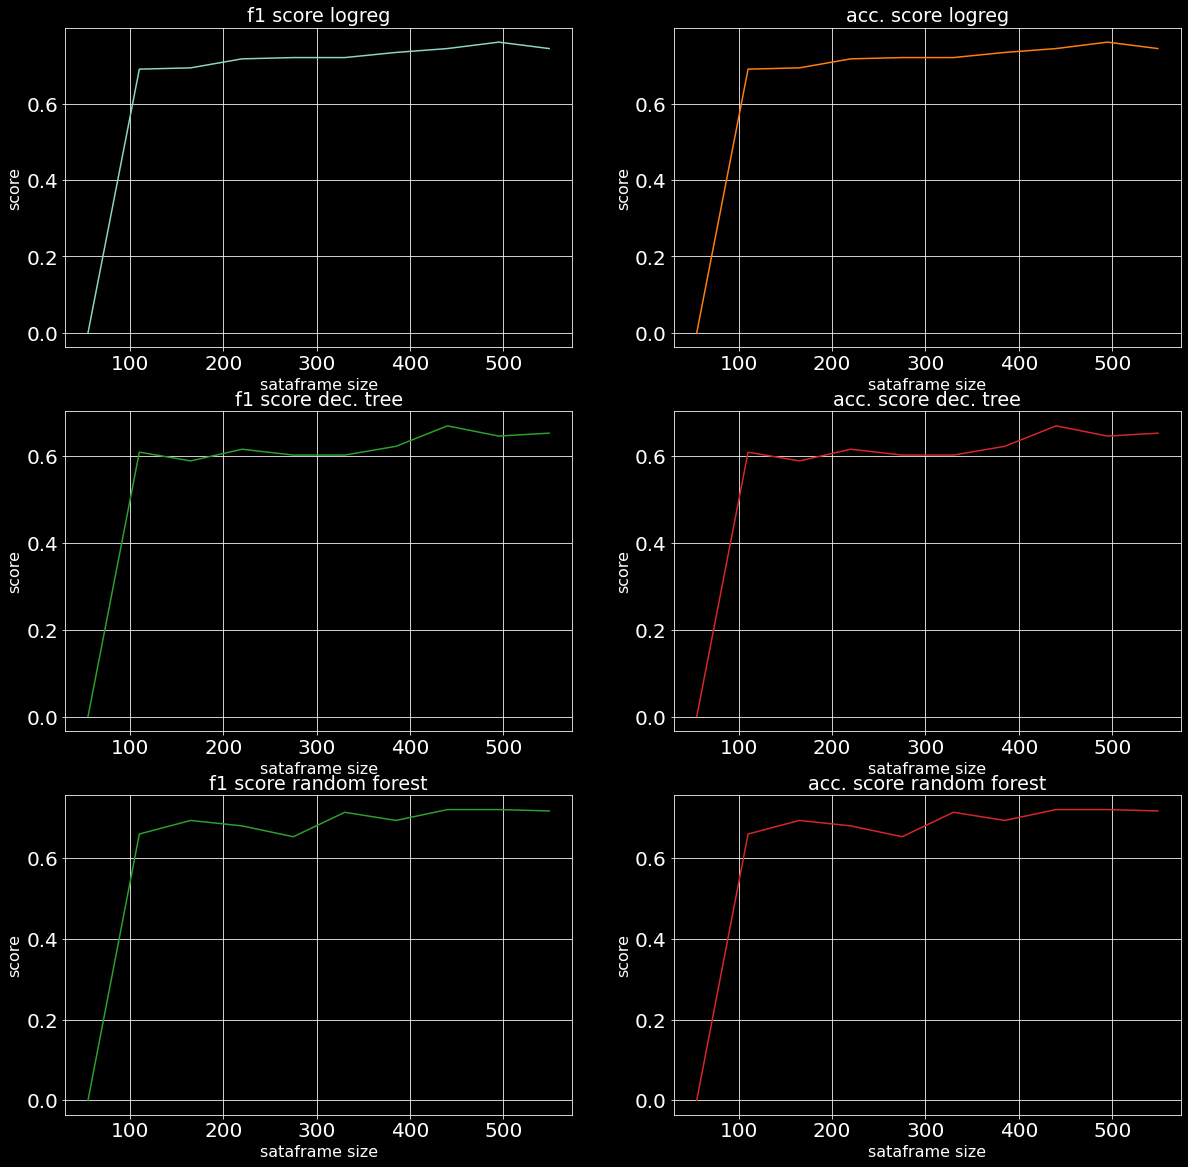

In [34]:
print(size_label)


plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = '16'
plt.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig, axs = plt.subplots(3, 2)

## Row 1

axs[0, 0].plot(size_label, F1_logreg)
axs[0, 0].set_title('f1 score logreg')
axs[0, 0].grid()

axs[0, 1].plot(size_label, Acc_logreg, 'tab:orange')
axs[0, 1].set_title('acc. score logreg')
axs[0, 1].grid()

## Row 2

axs[1, 0].plot(size_label, F1_dtree, 'tab:green')
axs[1, 0].set_title('f1 score dec. tree')
axs[1, 0].grid()

axs[1, 1].plot(size_label, Acc_dtree, 'tab:red')
axs[1, 1].set_title('acc. score dec. tree')
axs[1, 1].grid()

## Row 3


axs[2, 0].plot(size_label, F1_forest, 'tab:green')
axs[2, 0].set_title('f1 score random forest')
axs[2, 0].grid()

axs[2, 1].plot(size_label, Acc_forest, 'tab:red')
axs[2, 1].set_title('acc. score random forest')
axs[2, 1].grid()

for ax in axs.flat:
    ax.set(xlabel='sataframe size', ylabel='score')